# Runge Kutta Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Order 1

In [2]:
def euler(f, y0, x0, x1, steps):
    """
    c = 1
    q = X
    
    xs, ys = euler(f, y0, x0, x1, steps).
    Euler's method for solving the
    initial value problem {y}' = {f(x,{y})},
    where {y} = {y[0],y[1],...,y[n-1]}.
    x0, y0 = initial conditions
    x1     = terminal value of x
    steps  = number of integration steps
    f      = user-supplied function that returns the
             array f(x,y) = {y’[0],y’[1],...,y’[n-1]}.
    """
    h = (x1 - x0) / steps
    xs = np.linspace(x0, x1, steps + 1)
    y = y0
    ys = [y]
    for x in xs[:-1]:
        y = y + f(x, y) * h
        ys.append(y)
    return xs, ys

### Order 2

In [3]:
def heun(f, y0, x0, x1, steps):
    """
    c = [1/2, 1/2]
    q = 1
    """
    xs = np.linspace(x0, x1, steps+1)
    h = (x1 - x0) / steps
    y = y0
    ys = [y]
    
    for x in xs[:-1]:
        y = y + (h / 2) * (f(x, y) + f(x+h, y + h*f(x, y)))
        
        ys.append(y)
        
    return xs, ys

In [19]:
def midpoint(f, y0, x0, x1, steps):
    """
    c = [0, 1]
    q = 1/2
    """
    xs = np.linspace(x0, x1, steps+1)
    h = (x1 - x0) / steps
    y = y0
    ys = [y]
    
    for x in xs[:-1]:
        k0 = h*f(x, y)
        k1 = h*f(x + h/2, y + k0/2)
        
        y = y + k1
        
        ys.append(y)
        
    return xs, ys

### Order 3

In [21]:
def SSPRK3(f, y0, x0, x1, steps):
    xs = np.linspace(x0, x1, steps+1)
    h = (x1 - x0) / steps
    y = y0
    ys = [y]
    
    for x in xs[:-1]:
        k0 = h*f(x, y)
        k1 = h*f(x + h, y + k0)
        k2 = h*f(x + 2*h/4, y + (k0 + k1)/4)
        
        y = y + (k0 + k1)/6 + 2/3*k2
        
        ys.append(y)
        
    return xs, ys

In [23]:
def kuttas(f, y0, x0, x1, steps):
    xs = np.linspace(x0, x1, steps+1)
    h = (x1 - x0) / steps
    y = y0
    ys = [y]
    
    for x in xs[:-1]:
        k0 = h*f(x, y)
        k1 = h*f(x + h/2, y + k0/2)
        k2 = h*f(x+h, y -k0 + 2*k1)
        
        y = y + (k0 + 4*k1 + k2) / 6
        
        ys.append(y)
        
    return xs, ys

### Order 4

In [26]:
def runge_kuttas(f, y0, x0, x1, steps):
    xs = np.linspace(x0, x1, steps+1)
    h = (x1 - x0) / steps
    y = y0
    ys = [y]
    
    for x in xs[:-1]:
        k0 = f(x, y)
        k1 = f(x + h/2, y + h * k0 / 2)
        k2 = f(x + h/2, y + h * k1 / 2)
        k3 = f(x + h, y + h * k2)
        
        y = y + h * (k0 + 2*k1 + 2*k2 + k3) / 6
        
        ys.append(y)
        
    return xs, ys

In [28]:
def rule_3_8(f, y0, x0, x1, steps):
    xs = np.linspace(x0, x1, steps+1)
    h = (x1 - x0) / steps
    y = y0
    ys = [y]
    
    for x in xs[:-1]:
        k0 = h * f(x, y)
        k1 = h * f(x + h/3, y + k0/3)
        k2 = h * f(x + 2/3*h, y - k0/3 + k1)
        k3 = h * f(x + h, y + k0 - k1 + k2)
        
        y = y + (k0 + 3*k1 + 3*k2 + k3) / 8
        
        ys.append(y)
        
    return xs, ys

In [42]:
# not sure if this one is correct
def SSPRK4(f, y0, x0, x1, steps):
    xs = np.linspace(x0, x1, steps+1)
    h = (x1 - x0) / steps
    y = y0
    ys = [y]
    
    for x in xs[:-1]:
        k0 = h * f(x, y)
        k1 = h * f(x + h/2, y + k0/2)
        k2 = h * f(x + h, y + (k0 + k1) / 2)
        k3 = h * f(x + h/2, y + (k0 + k1 + k2) / 6)
        
        y = y + (k0 + k1 + k2 + 3*k3) / 6
        
        ys.append(y)
        
    return xs, ys

# Order 5

In [38]:
def butchers(f, y0, x0, x1, steps):
    xs = np.linspace(x0, x1, steps+1)
    h = (x1 - x0) / steps
    y = y0
    ys = [y]
    
    for x in xs[:-1]:
        k0 = h * f(x, y)
        k1 = h * f(x + h/4, y + k0/4)
        k2 = h * f(x + h/4, y + (k0 + k1)/8)
        k3 = h * f(x + h/2, y - k1/2 + k2)
        k4 = h * f(x + 3*h/4, y + 3*k0/16 + 9*k3/16)
        k5 = h * f(x + h, y - 3*k0/7 + 2*k1/7 + 12*k2/7 - 12*k3/7 + 8*k4/7)
        
        y = y + (7*k0 + 32*k2 + 12*k3 + 32*k4 + 7*k5) / 90
        
        ys.append(y)
        
    return xs, ys

# Testing

In [11]:
func = lambda x, y: np.array([-2.0 * y[1], 2.0 * y[0]])
x0, x1, y0 = 0.0, np.pi, np.array([1.0, 0.0])

def visualize(f, dx=func, y0=y0, x0=x0, x1=x1, title=''):
    
    xs, ys = f(dx, y0, x0, x1, 50)
    
    grid = np.linspace(-1.5, 1.5, 16)
    qx = [[func(x0, np.array([gx, gy]))[0] for gx in grid] for gy in grid]
    qy = [[func(x0, np.array([gx, gy]))[1] for gx in grid] for gy in grid]
    
    plt.quiver(grid, grid, qx, qy, pivot='mid')
    plt.plot([y[0] for y in ys], [y[1] for y in ys], '.-b')
    plt.title('{}: $|\Delta y| = {}$'.format(title, np.linalg.norm(ys[0]-ys[-1])));
    plt.xlabel('$y_0$'); plt.ylabel('$y_1$'); plt.axis('square'); plt.show()

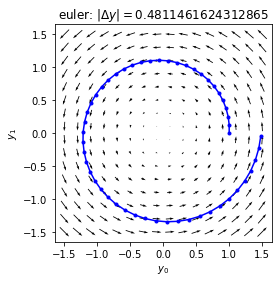

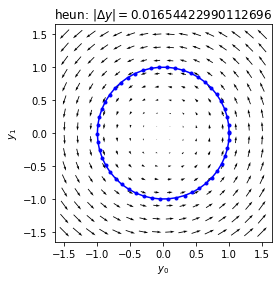

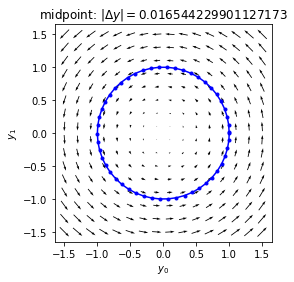

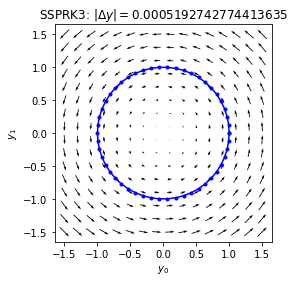

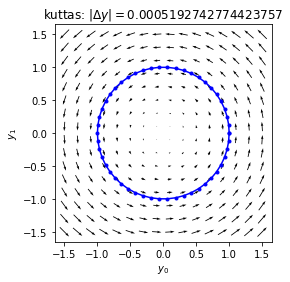

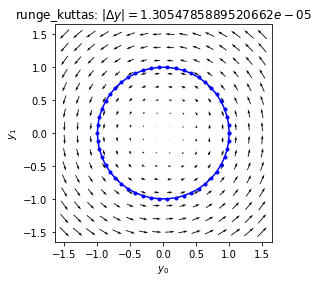

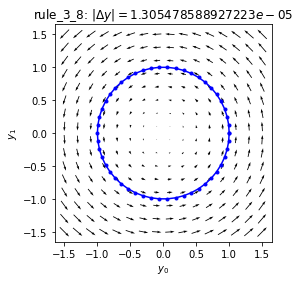

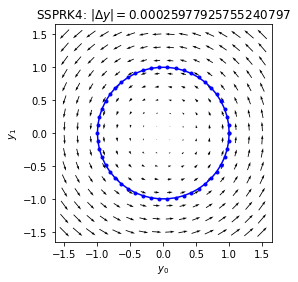

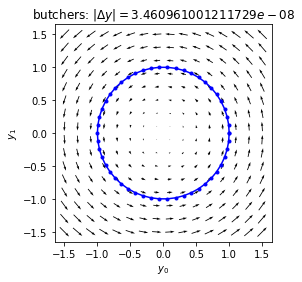

In [43]:
runge_kutta_methods = [
    euler, 
    heun,
    midpoint,
    SSPRK3,
    kuttas,
    runge_kuttas,
    rule_3_8,
    SSPRK4,
    butchers
]

for method in runge_kutta_methods:
    visualize(method, title=method.__name__)